## OpenCV를 활용한 객체 검출
- OpenCV 내에서 yolov3의 객체를 라이브러리로 제공
- OpenCV DNN 모델 사용해서 YOLO 수행   


OpenCV에서 YOLOv3를 사용하여 객체 탐지하는 과정

1. 모델 다운로드
2. 매개 변수 초기화
3. 모델과 클래스 로드 
- yolov3.weights : 사전 훈련된 가중치 파일
- yolov3.cfg : 환경 설정 파일 
4. 입력 읽기 : 이미지 읽기 
5. 각 프레임 처리 : Blob 형식 


#### cv 활용한 객체 검출 처리순서
1. 이미지 주입(일반이미지, 웹캡 스트림, 컴퓨터캡처, 영상 등 ndarray로 치환할 수 있다면 사용 가능)
2. S x S로 이미지 나누기(그리드)
3. 각 그리드에서 예측을 한 후 이를 종합해서 bouding box를 구성

### OpenCV DNN YOLO 사용하기(사용법 위주로)
- yolo 사이트에서 기 학습된 모델의 weight와 conf 파일을 받아와야 함
- https://pjreddie.com/darknet/yolo/
- weight file : 훈련된 모델
- cfg file : 구성파일(모델 구성파일)
- name files : 모델이 감지할 수 있는 객체 명

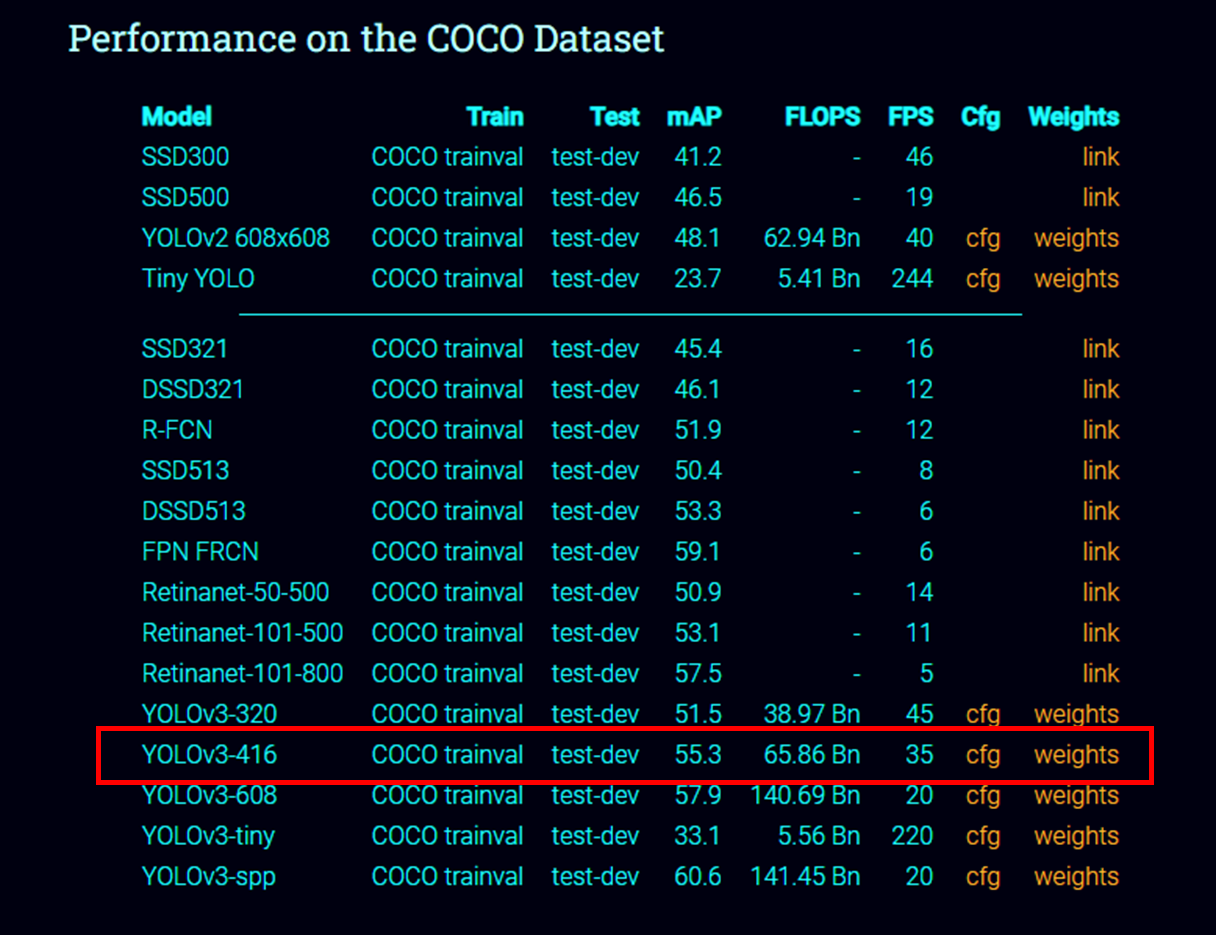

### Open CV: 비전 처리 패키지를 활용한 YOLO모델 구현
- 기 학습된 모델 활용
- 가중치파일과 구성파일 활용
- 모델 구성 : cv.dnn.readNet(가중치파일, 구성파일)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# opencv-python 설치
# 아나콘다 가상환경에서 설치
# conda activate DLEnv
# !pip install opencv-python
# !pip install wget
import cv2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget
import os

In [6]:
# 3개 파일 다운로드 
# yolov3.cfg,  yolov3.weights, coco.names
# url = "https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg" # html 페이지 다운로드됨

url = "https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true" # yolov3.cfg 파일
wget.download(url)
url = "https://pjreddie.com/media/files/yolov3.weights"
wget.download(url)
url = "https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true"
wget.download(url)

100% [................................................................................] 8342 / 8342

'yolov3.cfg'

100% [......................................................................] 248007048 / 248007048

'yolov3.weights'

100% [..................................................................................] 625 / 625

'coco.names'

In [7]:
# 기 학습된 모델 가중치를 활용한 구성
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

### yolov3 라벨
- ms coco 데이터셋을 사용하는 구조 : classes 수가 80
- 해당 데이터셋 라벨 파일 읽어서 저장

In [8]:
### label 작성

# txt 파일 아니라도 읽을 수 있음
classes=[]
with open("coco.names","r") as f : 
    classes=[line.strip() for line in f.readlines()]
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
len(classes)

80

In [10]:
## yolov3 층 확인
layer_names = net.getLayerNames()
len(layer_names)
print(layer_names)

254

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

### 출력 레이어 이름 가져오기 
    - OpenCV Net 클래스의 forward 함수에는 네트워크가 어디까지 실행되어야 할지에 대한 
        - 끝 레이어(ending layer) 필요
        - 전체 네트워크를 통해서 실행되기 때문에 네트워크 마지막 레이어를 식별해야 할 필요가 있음
        
        - getUnconnectedOutLayers() 함수
            - 네트워크의 마지막 레이어로 인식되는, 연결되어 있지 않은 출력 레이어 이름 제공 

In [11]:
# 총 3개의 output layer(82,94,106레이어) 인덱스 
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [12]:
layer_names[199]  # (13x13)
layer_names[226]  # (26x26)
layer_names[253]  # (52x52)

'yolo_82'

'yolo_94'

'yolo_106'

In [13]:
# 총 3개의 output layer를 갖고 있음(82,94,106레이어)

output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
output_layers

# getUnconnectedOutLayers()
# 맨마지막 레이어

['yolo_82', 'yolo_94', 'yolo_106']

### 전체 모델 layer에서 82, 94, 106의 3개의 yolo 출력을 반환함

In [16]:
# 객체 검출하기 위한 샘플 이미지 
## 객체 검출 이미지  beatles01
img = cv2.imread('./data/img/beatles.jpg')

## 이미지 BGR 형태로 읽어오므로 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
height,width,channels = img.shape

(633, 806, 3)

#### 이미지 전처리
- 네트워크(모델)에서 이미지를 바로 사용할 수 없기 때문에 모델에 맞는 이미지로 변경  
- blobFromImage() 사용 : yolo에서 Blob 파일을 사용하므로 blob 형식으로 변환
    - blob : 4D Tensor : NCHW 행렬
        - N(이미지 수), C(채널 수), H(세로길이), W(가로길이) 
 - 사용하는 yolo 가중치 416 사용      
    - cv2.dnn.blobFromImage(img,scalefactor=1/255.0, size=(416,416), swapRB=True,crop=False)

In [17]:
## 이미지 전처리 진행 - cv2.dnn 모델이 사용하는 형태로 변환
# Yolov3 416에서는 416x416 Input 받음 - size(416, 416)
# BGR을 RGB로 변환
blob = out = cv2.dnn.blobFromImage(img,scalefactor=1/255.0, size=(416,416), swapRB=True,crop=False)

In [18]:
print(type(out))
print(out.shape)
print(out.size)

<class 'numpy.ndarray'>
(1, 3, 416, 416)
519168


In [19]:
# 해당 이미지를 모델에 주입 : 객체 검출을 하기 위한 이미지 input
net.setInput(blob)

In [20]:
# 객체 검출 : forward()
outs = net.forward(output_layers)

In [21]:
len(outs[0][0])
outs[0][1]


85

array([4.5056369e-02, 3.4771107e-02, 2.6116937e-01, 9.0914059e-01,
       4.4558399e-10, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

### bounding box 그리기

In [22]:
# 정보를 화면에 표시
class_ids = [] # 추정된 라벨 id
confidences = [] # 추정된 라벨에 대한 신뢰도
boxes = [] # 바운딩박스 좌표
n=0
for out in outs: # outlyaer0번의 결과, 1번의 결과 2번의 결과가 한번씩 대입
    n += 1
    for detection in out: # 각 layer의 결과가 detection에 한번씩 대입
        scores = detection[5:] # 앞의 5개 data는 box좌표와 신뢰도가 있고, 
#         5번 인덱스부터 클래스에 대한 확률이 들어감
        class_id = np.argmax(scores) # 제일 확률이 높은 값의 인덱스        
        confidence = scores[class_id] # 제일높은 확률 값 - 확률값을 사용해서 conf 생성
        
        if confidence > 0.5: # 제일 큰 확률값이 0.5보다 크면 객체 검출
            # img를 blob 화 하면서 scaling이 진행되었으므로 이미지 원 크기에 비례해서 조정해야 함
            # 이미지에 box그리기 위해서 x,y 중심점(이미지 중심점) 계산
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            # 이미지의 width height 계산
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표(중심좌표에서 w,h의 50%만큼 감소)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

### 추출된 모든 정보를 화면에 표시
- Box : 감지된 개체를 둘러싼 사각형의 좌표
- Label : 감지된 물체의 이름
- Confidence : 0에서 1까지의 탐지에 대한 신뢰도

In [ ]:
boxes

array([ 3,  5, 14, 12, 27, 22,  9, 29,  6, 25, 30, 26])

In [ ]:
confidences

In [ ]:
class_ids

In [24]:
conf_threshold = 0.5
nms_threshold = 0.4
indexes =cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold) # 비틀즈
indexes

array([ 3,  5, 14, 12, 27, 22,  9, 29,  6, 25, 30, 26], dtype=int32)

In [25]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))
colors

array([[205.81494813,  18.71392977,  38.9159304 ],
       [221.62769517,  56.47994501, 178.92813561],
       [185.58127586,  70.74021739,  31.44864533],
       [  0.48858859,  81.66741662, 228.54477721],
       [ 67.06355957,  99.34150269, 251.07256587],
       [ 34.4066868 , 138.5489425 ,  54.30652853],
       [176.62864222, 227.91834443, 208.43221216],
       [ 38.95942608, 186.88431588,  87.18213367],
       [ 45.37049172,  57.92917854,  86.90908008],
       [158.74157529, 130.87885594, 187.86712043],
       [ 19.58310704, 134.49009235, 150.80569202],
       [ 86.56385752, 241.81694548, 186.42685604],
       [175.61564299,  29.97414495, 198.6098516 ],
       [224.60357096, 246.85453333,  14.57303859],
       [ 78.67326016, 169.70108278, 175.20587548],
       [ 33.09058529,  87.75901585, 197.82210204],
       [223.9422907 ,  25.4208381 , 252.43032181],
       [ 95.47285298, 245.60279989, 178.29486384],
       [195.68574445,  30.45083937, 250.31058341],
       [237.26966126, 102.40264

person 1.0
person 1.0
person 0.99
person 0.98
car 0.93
car 0.87
car 0.87
car 0.83
car 0.77
car 0.67
person 0.58
car 0.51


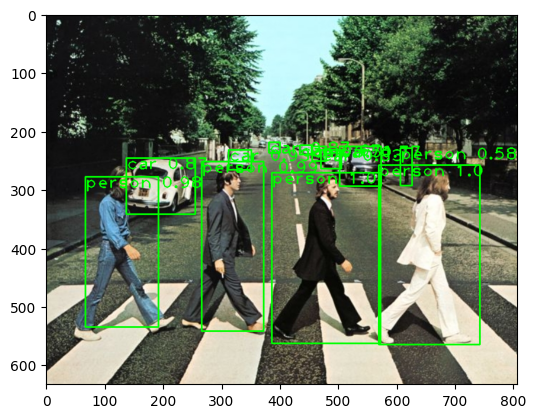

In [26]:
# box 처리할 개체가 여러개일 경우 차원 축소

for i in indexes.flatten() : 
    x,y,w,h = boxes[i]
#     print(x,y,w,h)
    label = str(classes[class_ids[i]])    
    confidence = str(round(confidences[i],2))
    
    color = colors[i]
    r = cv2.rectangle(img, (x,y), ((x+w), (y+h)), (0, 255,0), 2)
    t = cv2.putText(img, label+" "+confidence,(x,y+20),font,2,(0,255,0),2) # t 의미 없음 
    print(label, confidence)
plt.imshow(img) 

### 예측 후 시각화 함수 구현

In [29]:
labels = []

def predict_yolo(img_path):
    labels.clear()
    # 이미지 가져오기
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = img.shape

    # 이미지 검출
    blob = cv2.dnn.blobFromImage( img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
    net.setInput(blob) 
    outs = net.forward(output_layers)

    # bounding box 그리기
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # 좌표
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(boxes), 3))
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]

            label = str(classes[class_ids[i]])            
            labels.append(label)
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

        print(labels)
        plt.imshow(img)
        plt.show()
    else:
        print('탐지된 물체가 없습니다.')


['person', 'person', 'person', 'person', 'car', 'car', 'car', 'car', 'car', 'car', 'person', 'car']


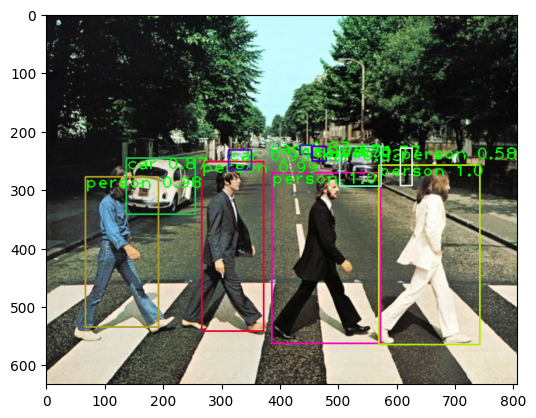

['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'truck', 'car', 'car']


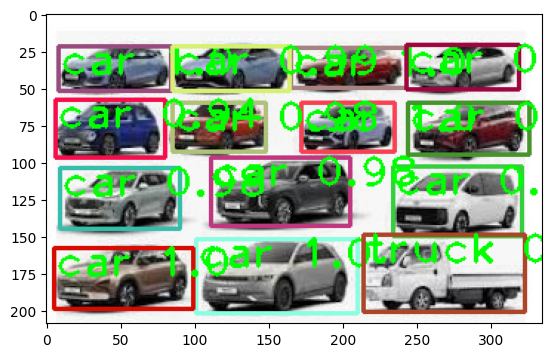

['cat']


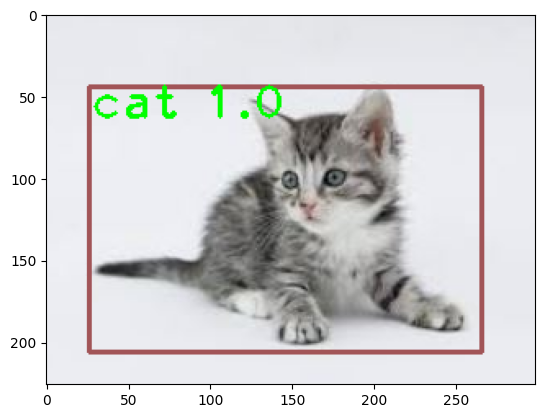

['person', 'person', 'person', 'person', 'person']


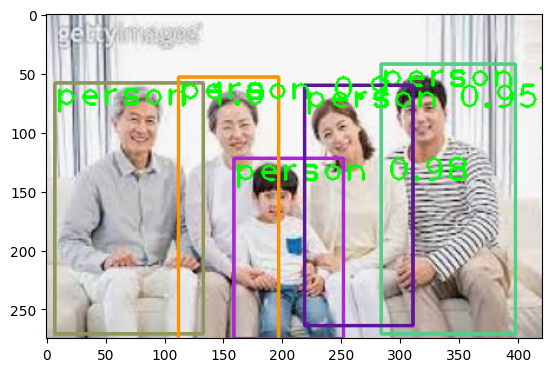

['dog', 'cat', 'dog', 'cat']


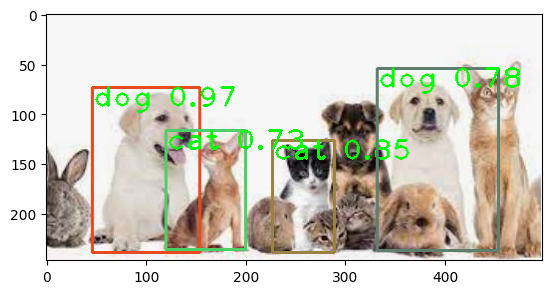

['refrigerator']


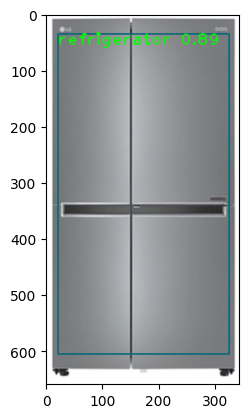

In [33]:
# 여러 이미지로 테스트 
import glob
import random


# 모든 이미지
paths = glob.glob('./data/img/*.jpg')
for img_path in paths:
    predict_yolo(img_path)